# Physical Activity Clustering
Cluster sensor data into different actions

## Imports and data reading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

In [3]:
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


## Data research

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

#### Missing-values

In [5]:
df.isna().sum()

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

<Axes: >

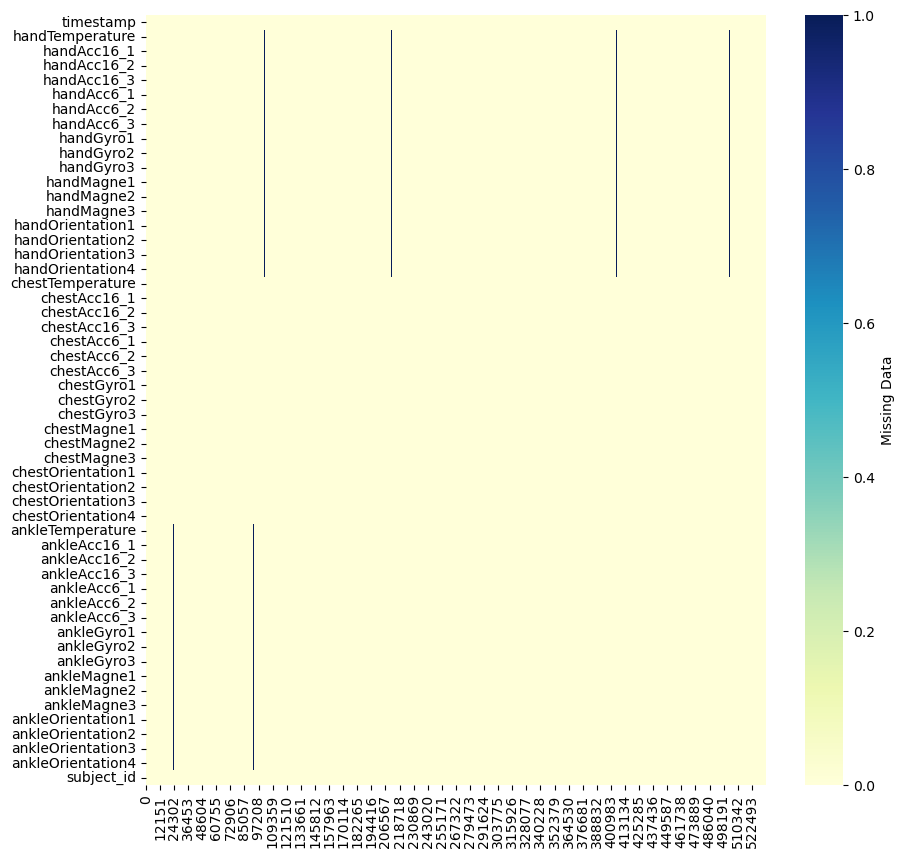

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

We don't need timestamp column, so let's drop it.

And we need to fill na-values. Let's fill it with mean values.

In [7]:
df = df.drop(columns=['timestamp'])

In [8]:
col_missing = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
               'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
               'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
               'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
               'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
               'handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc16_3',
               'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3',
               'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
               'handOrientation3', 'handOrientation4']

for i in col_missing:
    df[i].fillna(df[i].mean(), inplace=True)

df.isna().sum()

handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3 

## Clustering

Let's use `KMeans` with 10 clusters for example and look at inertia of model, then we need to find optimal number of clusters using the elbow method

In [9]:
from sklearn.cluster import KMeans

n_clusters = 10

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_
print(f"For n_clusters = {n_clusters} the inertia is : {inertia}")

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 the inertia is : 972281164.8200167


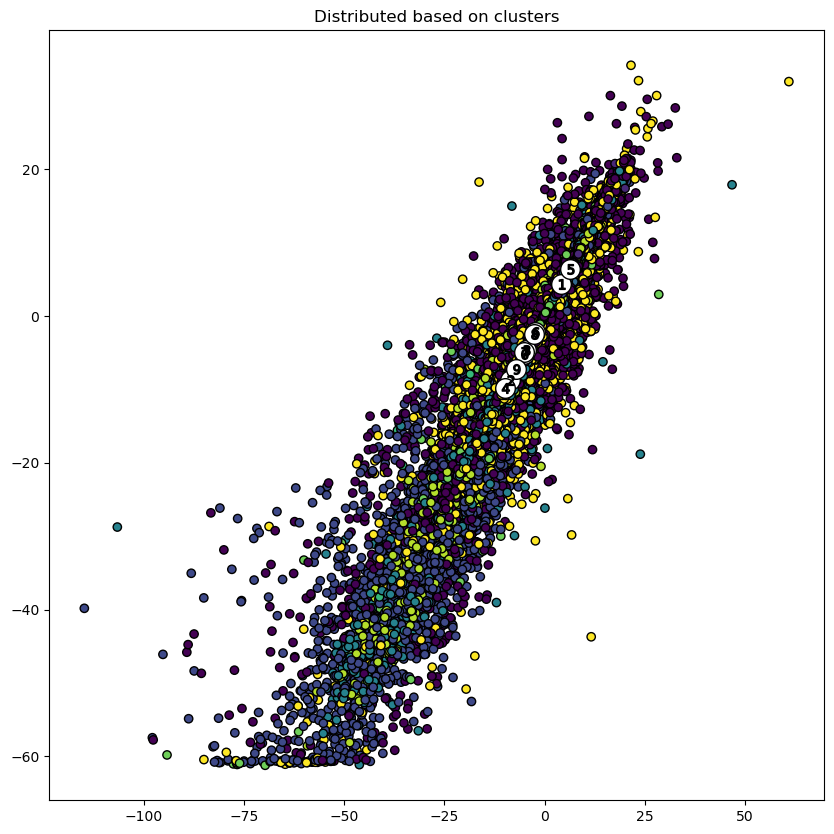

In [10]:
plt.figure(figsize=(10,10))

plt.scatter(df.iloc[:, 1], df.iloc[:, 4], c=cluster_labels, edgecolor='k')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, 1], centers[:, 4], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[1], c[4], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    
plt.title("Distributed based on clusters");

In [11]:
%%time

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])
                                                             
for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)
    
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_k

CPU times: total: 31min 9s
Wall time: 2min 17s


<Axes: >

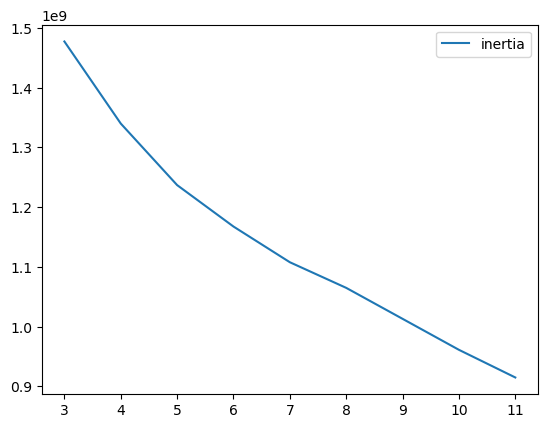

In [12]:
inertia_df.plot()

In [13]:
inertia_df

,inertia
3,1477178626.493956
4,1339897725.233522
5,1236912155.205693
6,1167574430.070552
7,1107855232.305312
8,1064974315.457726
9,1013161809.489138
10,961316544.604282
11,915055239.966743


In [14]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=7, random_state=42)

cluster_labels = clusterer.fit_predict(df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
cluster_labels

array([3, 2, 5, ..., 1, 6, 0])

## Predictions

In [16]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,3
1,1,2
2,2,5
3,3,4
4,4,0
...,...,...
534596,534596,0
534597,534597,4
534598,534598,1
534599,534599,6


In [17]:
predictions['activityID'].unique()

array([3, 2, 5, 4, 0, 1, 6])

In [18]:
predictions['activityID'] = predictions['activityID'].map({3: 1, 2: 2, 5: 3, 4: 4, 0: 5, 1: 6, 6: 7})

In [19]:
predictions

,index,activityID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
...,...,...
534596,534596,5
534597,534597,4
534598,534598,6
534599,534599,7


In [20]:
predictions.to_csv('solution.csv', index=False)

## Other method

This time we will fill in the gaps in the data using the method `interpolate`

In [21]:
df_2 = pd.read_csv('data/Physical_Activity_Monitoring_unlabeled.csv')

In [22]:
df_2.drop(columns=['timestamp'], inplace=True)

In [23]:
# интерпояция
df_2 = df_2.interpolate()

Also we need to try Standard our data

### Standardization of data

In [24]:
from sklearn.preprocessing import StandardScaler

df_std = StandardScaler().fit_transform(df_2)

scaled_df = pd.DataFrame(df_std, index=df.index, columns=df.columns)
scaled_df

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,1.383760,0.757231,0.584776,0.510664,0.762694,0.616920,0.534955,-0.011434,-0.026646,-0.000382,...,0.010026,0.013753,0.737136,1.134555,-1.145553,-0.510941,0.786246,1.336797,-0.708140,0.190410
1,-1.542161,0.051790,0.072016,1.098267,-0.226447,0.000586,0.693620,0.107743,-0.437495,-0.007905,...,-1.032808,0.877262,-0.210992,-0.804863,-0.896624,0.725106,-0.851330,0.297695,-0.536677,-1.103768
2,1.098304,0.344312,-1.781430,-0.864405,0.364464,-1.869295,-0.835905,0.024908,0.014511,-0.007048,...,0.035695,-0.004352,0.515551,0.638528,0.590981,-0.732416,1.373972,0.262530,1.674988,1.484589
3,-0.293292,-1.252472,0.362269,-0.831548,-1.309192,0.393529,-0.897058,1.489085,-0.085672,-1.133556,...,-0.213025,-1.720091,0.104544,1.450536,0.369273,0.186609,1.565125,0.008559,1.114097,-1.103768
4,0.598757,0.627159,0.752136,0.083334,0.640523,0.780732,0.146643,0.001532,-0.039074,-0.020171,...,0.005874,-0.002954,0.569350,-0.275132,-0.208420,-0.628202,-1.176374,-0.146954,-0.890970,0.621803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.812849,-0.659715,0.202325,-0.310987,-0.753307,0.519869,-0.075309,-0.128408,0.805766,2.708128,...,0.738288,-0.422473,0.194368,-1.155074,0.497191,-0.139528,-1.093288,0.733590,-0.296111,0.190410
534597,1.044781,-0.466995,0.037284,-0.400220,-0.517513,0.195118,-0.254573,0.028656,0.193082,1.962559,...,-2.808538,-1.501461,-0.360189,1.335589,0.094996,0.251696,1.345437,0.198171,1.414949,0.190410
534598,1.276714,-0.274276,-0.127756,-0.489454,-0.281719,-0.129634,-0.433837,0.185719,-0.419602,1.216991,...,-0.003788,-0.198810,-1.085757,0.831770,-0.874481,0.669670,0.696299,1.318086,0.699344,0.190410
534599,-2.505574,1.404064,0.997765,-3.439181,1.803451,0.371647,-2.727570,3.067928,2.949408,0.054569,...,0.621058,-2.744020,-0.279940,-0.593700,1.398596,-0.990360,-1.266513,-1.047464,-0.906017,0.621803


Now we have 52 features, let's try `PCA` method to find optimal number of componetns

### PCA

In [25]:
%%time
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents)

CPU times: total: 35.1 s
Wall time: 3.8 s


In [26]:
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-5.826682,-0.472735,-0.248549,0.984905,-0.271502,-0.641068,0.913805,-0.089773,1.710360,-0.579039,0.787554,1.460513,0.466322,0.652515,0.230402
1,0.684865,3.821858,-1.872733,-0.615042,0.857649,0.542113,-2.812891,0.985906,-0.590158,0.592814,-0.585017,0.507847,0.501183,1.554650,0.715717
2,-0.049012,-3.038805,-1.649130,-1.122285,-0.813767,1.667671,0.624260,-0.845560,0.426663,-0.380201,0.582648,-0.844241,0.574689,-1.554475,1.584040
3,3.709283,-1.238836,0.420239,-1.528422,1.366992,0.753154,-0.120523,2.225063,0.271148,-2.754328,0.021926,0.071046,-0.243829,-0.212837,0.975180
4,-0.517601,0.524660,0.594603,2.325804,0.045228,-0.759007,-0.892090,-0.448591,0.857210,0.189284,1.319285,-0.574943,-0.091848,-0.125266,0.370650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,2.815565,1.176269,0.283826,1.130504,-4.217507,-1.231857,-1.325671,-1.927638,1.082268,0.682267,3.023023,0.583143,-0.606218,-0.531626,-1.801190
534597,1.334613,-3.313730,2.392913,-0.723750,-0.232108,3.076805,-0.325891,0.508683,3.000193,-0.310524,-0.232176,-0.425094,-0.210738,3.282520,-1.325556
534598,0.820704,-2.202584,-0.286084,-1.980504,-0.568799,-0.601963,0.594358,-0.767834,1.048422,-1.204119,0.417596,1.262163,1.161535,1.409457,0.886121
534599,5.092021,-0.838624,5.628147,2.378833,-2.930441,-1.590909,0.966096,1.466507,0.172219,4.523383,-1.147381,-2.503339,1.555641,-0.797740,3.405720


In [27]:
pca = PCA(.90)

principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data = principalComponents)

In [28]:
pca.n_components_ 

26

We find optimal number of components - **26**

In [29]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-5.826680,-0.472706,-0.248615,0.984735,-0.271668,-0.640502,0.913364,-0.089971,1.710427,-0.581988,...,-0.102925,0.580397,0.294979,-0.174074,-0.238441,0.017488,-0.140140,-0.023658,0.194043,0.376816
1,0.684851,3.821722,-1.872570,-0.615200,0.859366,0.542740,-2.813177,0.987923,-0.588005,0.598760,...,0.260739,0.537671,0.901407,-0.126017,0.954344,-0.022453,0.019373,-0.332376,-1.206956,-0.446041
2,-0.049015,-3.038748,-1.649047,-1.121980,-0.813681,1.668096,0.622833,-0.846620,0.429407,-0.386028,...,-0.167273,-0.290921,-0.466999,1.043967,1.099366,0.461395,1.013144,0.540024,-0.159919,0.510531
3,3.709295,-1.238678,0.419645,-1.528125,1.363183,0.753192,-0.117007,2.223653,0.267078,-2.774464,...,1.177330,-0.163485,1.496221,0.341421,1.450142,-0.887319,0.260552,0.026651,3.243382,-0.193473
4,-0.517602,0.524601,0.594603,2.325894,0.045655,-0.758331,-0.891122,-0.447443,0.857922,0.191272,...,0.125651,0.080813,-0.239320,0.254781,0.293876,0.437238,0.180617,0.252257,-0.107593,0.122725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,2.815568,1.176203,0.283901,1.130291,-4.216656,-1.231953,-1.324693,-1.926440,1.080870,0.691433,...,0.067388,-1.235865,-0.703854,-0.985716,0.950335,-1.097057,0.167851,-0.118263,-0.638687,0.737604
534597,1.334630,-3.313576,2.392337,-0.723700,-0.234030,3.078677,-0.322431,0.508226,2.998469,-0.330870,...,-1.229540,1.995992,-0.433045,1.041299,1.312045,-0.021768,-0.010118,-0.393498,0.931186,-0.331013
534598,0.820694,-2.202891,-0.286335,-1.981147,-0.567739,-0.599992,0.597269,-0.762411,1.048165,-1.195108,...,-0.642373,-0.903442,-1.477524,-0.183747,-0.859563,-0.229592,-1.042894,0.141883,-0.550810,-1.645254
534599,5.092058,-0.837977,5.628842,2.380430,-2.933096,-1.594964,0.955725,1.451152,0.173336,4.506895,...,0.350156,-0.872486,-3.334702,2.045563,2.243597,0.028623,4.674715,-2.880143,-1.716861,1.429859


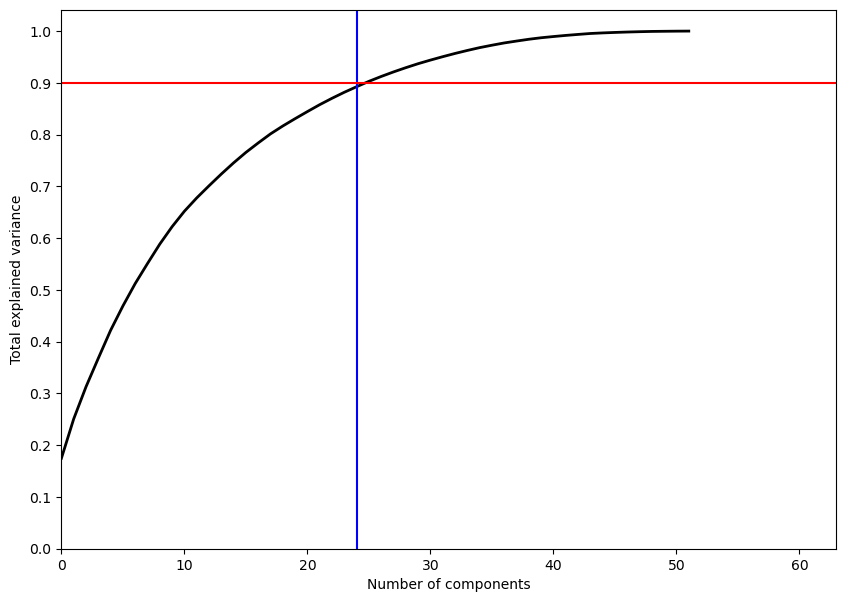

CPU times: total: 11.4 s
Wall time: 1.75 s


In [30]:
%%time
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(24, c='b')
plt.axhline(0.9, c='r')
plt.show();

In [31]:
clusterer = KMeans(n_clusters=7, random_state =42)

cluster_labels = clusterer.fit_predict(principalComponents)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
clusterer.inertia_

16355572.42976835

## Predictions... again

In [33]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,4
1,1,5
2,2,2
3,3,2
4,4,1
...,...,...
534596,534596,3
534597,534597,2
534598,534598,2
534599,534599,0


In [34]:
predictions['activityID'].unique()

array([4, 5, 2, 1, 0, 3, 6])

In [35]:
predictions['activityID'] = predictions['activityID'].map({4: 1, 5: 2, 2: 3, 1: 4, 0: 5, 3: 6, 6: 7})

In [36]:
predictions.to_csv('solution.csv', index=False)